<a href="https://colab.research.google.com/github/raghav-rathi/Hello-World/blob/master/FinalBennetProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**CROP YIELD PREDICTION**

#Dataset 1

##Reading Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Bennet/apy.csv', encoding='utf-8')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,NaN
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,NaN
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,NaN
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,NaN


##Reducing Data to One State for Ease

In [ ]:
df = df[df['State_Name'] == "Andhra Pradesh"]

###Making Yield Column

In [ ]:
df['Yield'] = df['Production']/df['Area']
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0,0.121495
204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0,0.357143
205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0,0.100000
206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0,1.287671
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0,1.918919
...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


##Corelation Heatmap

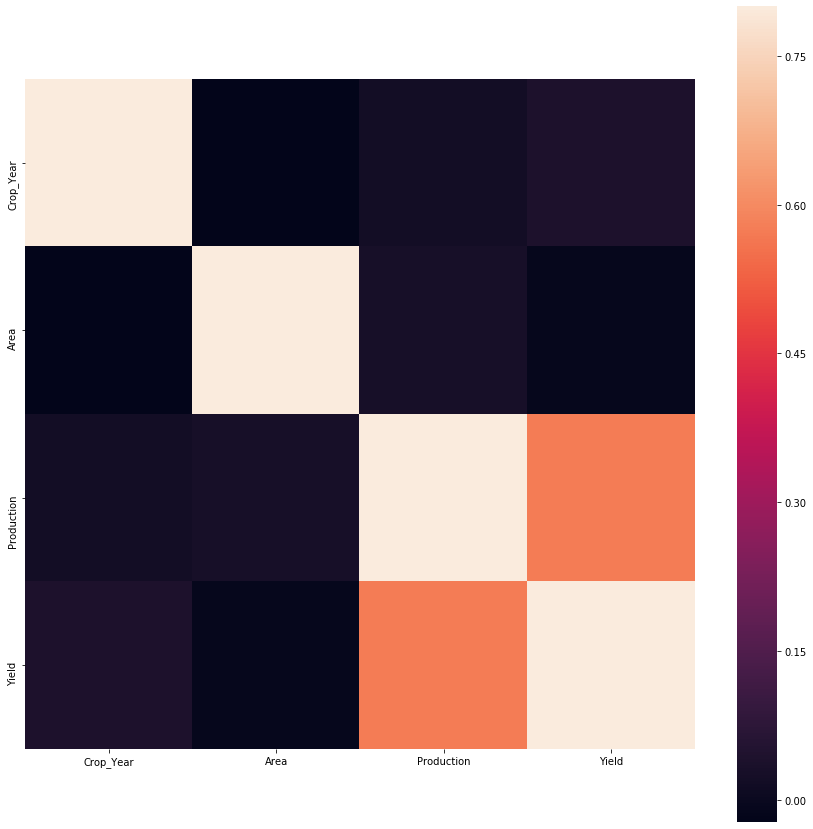

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

##Taking Data only after 2004

In [ ]:
df = df[df['Crop_Year']>=2004]
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
493,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993
494,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1021.0,403.0,0.394711
495,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1578.0,923.0,0.584918
496,Andhra Pradesh,ANANTAPUR,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201
497,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048
...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477


##Encoding All Categorical Data

In [ ]:
df = df.join(pd.get_dummies(df['District_Name']))
df = df.join(pd.get_dummies(df['Season']))
df = df.join(pd.get_dummies(df['Crop']))
df = df.join(pd.get_dummies(df['Crop_Year']))
df = df.join(pd.get_dummies(df['State_Name']))
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,SPSR NELLORE,SRIKAKULAM,VISAKHAPATANAM,VIZIANAGARAM,WEST GODAVARI,Kharif,Rabi,Whole Year,Arecanut,Arhar/Tur,Bajra,Banana,Brinjal,Cabbage,Cashewnut,Castor seed,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Dry chillies,Dry ginger,Garlic,Ginger,...,Mesta,Moong(Green Gram),Niger seed,Onion,Other Rabi pulses,Other Kharif pulses,Papaya,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Wheat,other oilseeds,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,32752.0,7893.0,0.240993,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
494,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1021.0,403.0,0.394711,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
495,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1578.0,923.0,0.584918,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
496,Andhra Pradesh,ANANTAPUR,2004,Kharif,Cotton(lint),8933.0,7041.0,0.788201,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
497,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3402.0,11288.0,3.318048,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0,3.177173,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0,13.549107,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0,0.892027,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0,33089.005477,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


##Dropping Unnecessory Columns

In [ ]:
df=df.drop('District_Name', axis=1)
df = df.drop('Season',axis=1)
df = df.drop('Crop',axis=1)
df = df.drop('Crop_Year', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('State_Name', axis=1)
df

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,SPSR NELLORE,SRIKAKULAM,VISAKHAPATANAM,VIZIANAGARAM,WEST GODAVARI,Kharif,Rabi,Whole Year,Arecanut,Arhar/Tur,Bajra,Banana,Brinjal,Cabbage,Cashewnut,Castor seed,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Lemon,...,Mesta,Moong(Green Gram),Niger seed,Onion,Other Rabi pulses,Other Kharif pulses,Papaya,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Wheat,other oilseeds,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,32752.0,0.240993,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
494,1021.0,0.394711,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
495,1578.0,0.584918,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
496,8933.0,0.788201,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
497,3402.0,3.318048,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,28046.0,3.177173,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9827,224.0,13.549107,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9828,5418.0,0.892027,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9829,21729.0,33089.005477,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


##Preprocessing

In [ ]:
from sklearn import preprocessing

In [ ]:

# Create x, where x the 'scores' column's values as floats
x = df[['Area']].values.astype(float)
x
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#df_normalized = pd.DataFrame(x_scaled)
x_scaled

df['Area'] = x_scaled
df

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,SPSR NELLORE,SRIKAKULAM,VISAKHAPATANAM,VIZIANAGARAM,WEST GODAVARI,Kharif,Rabi,Whole Year,Arecanut,Arhar/Tur,Bajra,Banana,Brinjal,Cabbage,Cashewnut,Castor seed,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Lemon,...,Mesta,Moong(Green Gram),Niger seed,Onion,Other Rabi pulses,Other Kharif pulses,Papaya,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Wheat,other oilseeds,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,0.037343,0.240993,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
494,0.001163,0.394711,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
495,0.001798,0.584918,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
496,0.010184,0.788201,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
497,0.003878,3.318048,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,0.031977,3.177173,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9827,0.000254,13.549107,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9828,0.006177,0.892027,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9829,0.024775,33089.005477,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
df.head()

,Area,Yield,ANANTAPUR,CHITTOOR,EAST GODAVARI,GUNTUR,KADAPA,KRISHNA,KURNOOL,PRAKASAM,SPSR NELLORE,SRIKAKULAM,VISAKHAPATANAM,VIZIANAGARAM,WEST GODAVARI,Kharif,Rabi,Whole Year,Arecanut,Arhar/Tur,Bajra,Banana,Brinjal,Cabbage,Cashewnut,Castor seed,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Lemon,...,Mesta,Moong(Green Gram),Niger seed,Onion,Other Rabi pulses,Other Kharif pulses,Papaya,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Wheat,other oilseeds,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Andhra Pradesh
493,0.037343,0.240993,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
494,0.001163,0.394711,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
495,0.001798,0.584918,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
496,0.010184,0.788201,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
497,0.003878,3.318048,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### Filling Empty Values With Mean

In [ ]:
df = df.fillna(df.mean())

##Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
b = df['Yield']
a = df.drop('Yield', axis = 1)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

          Area  ANANTAPUR  CHITTOOR  ...  2013  2014  Andhra Pradesh
1711  0.000246          0         1  ...     1     0               1
5452  0.031408          0         0  ...     1     0               1
538   0.003756          1         0  ...     0     0               1
2336  0.014880          0         0  ...     0     0               1
2172  0.001397          0         0  ...     0     0               1
...        ...        ...       ...  ...   ...   ...             ...
6278  0.001999          0         0  ...     0     1               1
8796  0.000129          0         0  ...     0     0               1
8831  0.000385          0         0  ...     0     0               1
8995  0.000344          0         0  ...     0     0               1
1644  0.000268          0         1  ...     0     0               1

[4199 rows x 82 columns]
          Area  ANANTAPUR  CHITTOOR  ...  2013  2014  Andhra Pradesh
577   0.000706          1         0  ...     0     0               1
4044  0.

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

###Random Forest Regressor

![alt text](http://onlinestatbook.com/2/estimation/graphics/MSE.gif)

In [ ]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
   regr.fit(a_train, b_train)
   b_pred = regr.predict(a_test)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(b_pred, b_test))
   print('MAE =', mae(b_pred, b_test))
   print('R2 Score =', r2_score(b_pred, b_test))
   

MSE = 344244.0619993072
MAE = 79.0739528510798
R2 Score = 0.8897409726497765


###Polynomial Support Vector Machine

In [ ]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(a_train,b_train)
pred=regressorpoly.predict(a_test)
print(regressorpoly.score(a_test,b_test))
print(r2_score(b_test,b_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.014337696667276136
0.8863535872418126


###XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
XGBModel = XGBRegressor()
XGBModel.fit(a_train,b_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(a_test)
MAE = mean_absolute_error(b_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
XGBpredictions

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  49.870773418945774


array([5.5103283, 5.0048275, 5.0821667, ..., 4.9217033, 3.30962  ,
       5.3301153], dtype=float32)

##Neural Network Implementation

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = a_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               10624     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 175,489
Trainable params: 175,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import History 
history = History()
History=NN_model.fit(a_train, b_train, epochs=50, batch_size=500, validation_split = 0.2, callbacks=[history])

Train on 3359 samples, validate on 840 samples
Epoch 1/50
3359/3359 [==============================] - 0s 11us/step - loss: 18.2043 - mean_absolute_error: 18.2043 - val_loss: 29.3649 - val_mean_absolute_error: 29.3649
Epoch 2/50
3359/3359 [==============================] - 0s 9us/step - loss: 25.3688 - mean_absolute_error: 25.3688 - val_loss: 30.0141 - val_mean_absolute_error: 30.0141
Epoch 3/50
3359/3359 [==============================] - 0s 12us/step - loss: 21.7141 - mean_absolute_error: 21.7141 - val_loss: 39.7449 - val_mean_absolute_error: 39.7449
Epoch 4/50
3359/3359 [==============================] - 0s 10us/step - loss: 21.9556 - mean_absolute_error: 21.9556 - val_loss: 28.8138 - val_mean_absolute_error: 28.8138
Epoch 5/50
3359/3359 [==============================] - 0s 10us/step - loss: 19.8332 - mean_absolute_error: 19.8332 - val_loss: 35.6134 - val_mean_absolute_error: 35.6134
Epoch 6/50
3359/3359 [==============================] - 0s 9us/step - loss: 17.2592 - mean_absolute

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


Text(0.5, 0, 'epoch')

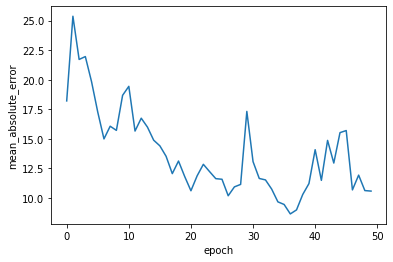

In [ ]:
print(history.history.keys())
plt.plot(History.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

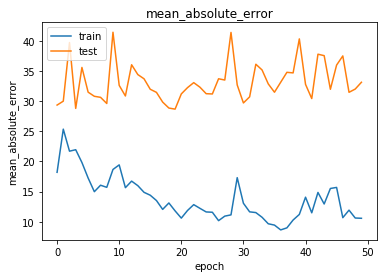

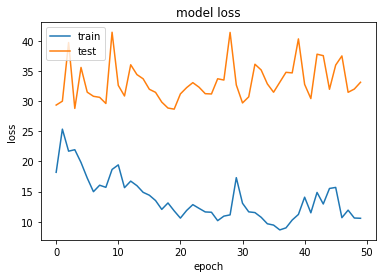

In [ ]:
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Dataset 2

##Reading Dataset

In [ ]:
import pandas as pd
df2 = pd.read_csv('/content/drive/My Drive/Bennet/wheat-2014-supervised.csv', encoding='utf-8')
df2

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.929839,-118.352109,11/30/2014 0:00,18.61,-3.01,0.00,6.77,0.69,0.0000,0.0000,0.00,0.0,0,0,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,Adams,Washington,47.150327,-118.958859,11/30/2014 0:00,19.67,-0.74,0.00,6.66,0.65,0.0000,0.0000,0.00,0.0,0,0,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,Adams,Washington,46.811686,-118.695237,11/30/2014 0:00,20.66,-0.14,0.00,6.55,0.67,0.0000,0.0000,0.00,0.0,0,0,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,Adams,Washington,47.162342,-118.699677,11/30/2014 0:00,19.69,-2.66,0.03,7.32,0.69,0.0000,0.0000,0.00,0.0,0,0,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,Adams,Washington,47.157512,-118.434056,11/30/2014 0:00,18.82,-3.04,0.04,7.62,0.70,0.0000,0.0000,0.00,0.0,0,0,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182544,Miami,Kansas,38.693595,-94.671846,6/3/2015 0:00,75.44,64.29,0.13,62.74,0.84,0.0211,0.2280,0.86,0.0,1,0,0,1013.01,75.44,64.29,9.31,133,6.26,134.803101,185,50.1
182545,Miami,Kansas,38.603699,-94.992247,6/3/2015 0:00,75.47,64.49,0.13,62.83,0.84,0.0206,0.2074,0.85,0.0,1,0,0,1012.99,75.47,64.49,9.29,132,6.29,133.913879,185,50.1
182546,Miami,Kansas,38.580826,-94.794660,6/3/2015 0:00,75.40,64.43,0.13,62.77,0.84,0.0212,0.2172,0.86,0.0,1,0,0,1013.01,75.40,64.43,9.28,132,6.27,129.938950,185,50.1
182547,Miami,Kansas,38.564866,-94.748021,6/3/2015 0:00,75.35,64.44,0.13,62.74,0.84,0.0214,0.2177,0.86,0.0,1,0,0,1013.01,75.35,64.44,9.28,132,6.26,129.938950,185,50.1


In [ ]:
df2.dtypes

CountyName                 object
State                      object
Latitude                  float64
Longitude                 float64
Date                       object
apparentTemperatureMax    float64
apparentTemperatureMin    float64
cloudCover                float64
dewPoint                  float64
humidity                  float64
precipIntensity           float64
precipIntensityMax        float64
precipProbability         float64
precipAccumulation        float64
precipTypeIsRain            int64
precipTypeIsSnow            int64
precipTypeIsOther           int64
pressure                  float64
temperatureMax            float64
temperatureMin            float64
visibility                float64
windBearing                 int64
windSpeed                 float64
NDVI                      float64
DayInSeason                 int64
Yield                     float64
dtype: object

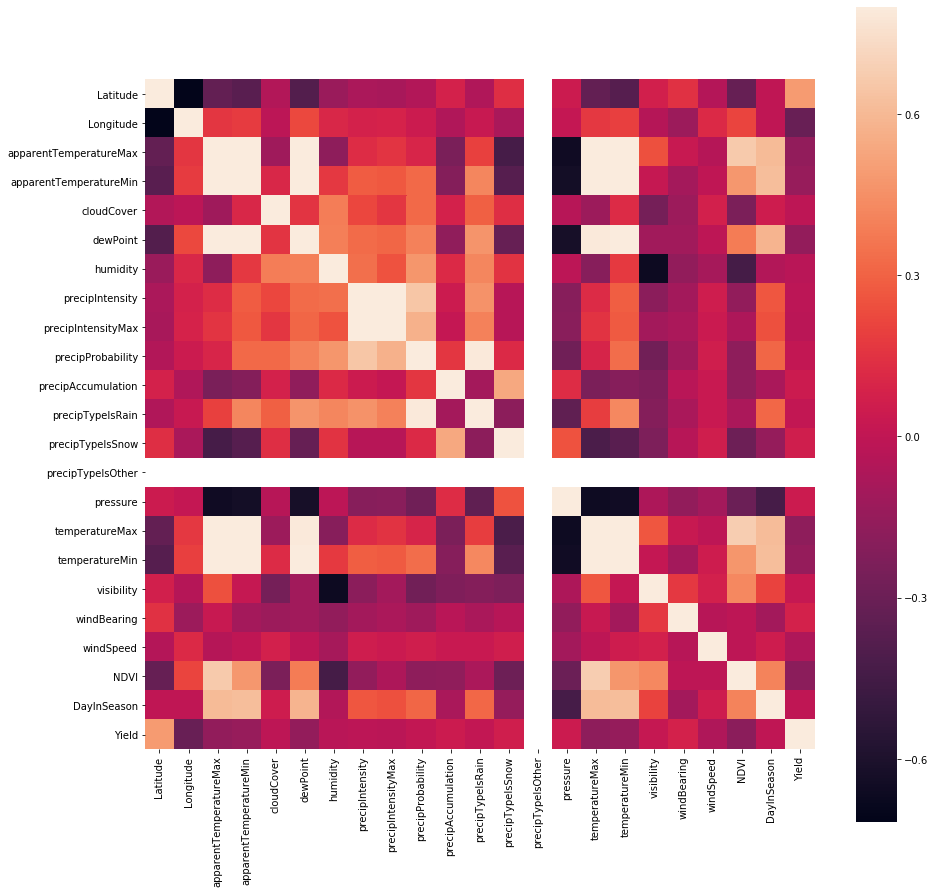

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb


C_mat = df2.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [ ]:
df2 = df2.drop('CountyName', axis=1)
df2 = df2.drop('State', axis=1)
df2 = df2.drop('Date', axis=1)
df2 = df2.drop('precipTypeIsOther', axis=1)
df2

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,46.929839,-118.352109,18.61,-3.01,0.00,6.77,0.69,0.0000,0.0000,0.00,0.0,0,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,47.150327,-118.958859,19.67,-0.74,0.00,6.66,0.65,0.0000,0.0000,0.00,0.0,0,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,46.811686,-118.695237,20.66,-0.14,0.00,6.55,0.67,0.0000,0.0000,0.00,0.0,0,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,47.162342,-118.699677,19.69,-2.66,0.03,7.32,0.69,0.0000,0.0000,0.00,0.0,0,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,47.157512,-118.434056,18.82,-3.04,0.04,7.62,0.70,0.0000,0.0000,0.00,0.0,0,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182544,38.693595,-94.671846,75.44,64.29,0.13,62.74,0.84,0.0211,0.2280,0.86,0.0,1,0,1013.01,75.44,64.29,9.31,133,6.26,134.803101,185,50.1
182545,38.603699,-94.992247,75.47,64.49,0.13,62.83,0.84,0.0206,0.2074,0.85,0.0,1,0,1012.99,75.47,64.49,9.29,132,6.29,133.913879,185,50.1
182546,38.580826,-94.794660,75.40,64.43,0.13,62.77,0.84,0.0212,0.2172,0.86,0.0,1,0,1013.01,75.40,64.43,9.28,132,6.27,129.938950,185,50.1
182547,38.564866,-94.748021,75.35,64.44,0.13,62.74,0.84,0.0214,0.2177,0.86,0.0,1,0,1013.01,75.35,64.44,9.28,132,6.26,129.938950,185,50.1


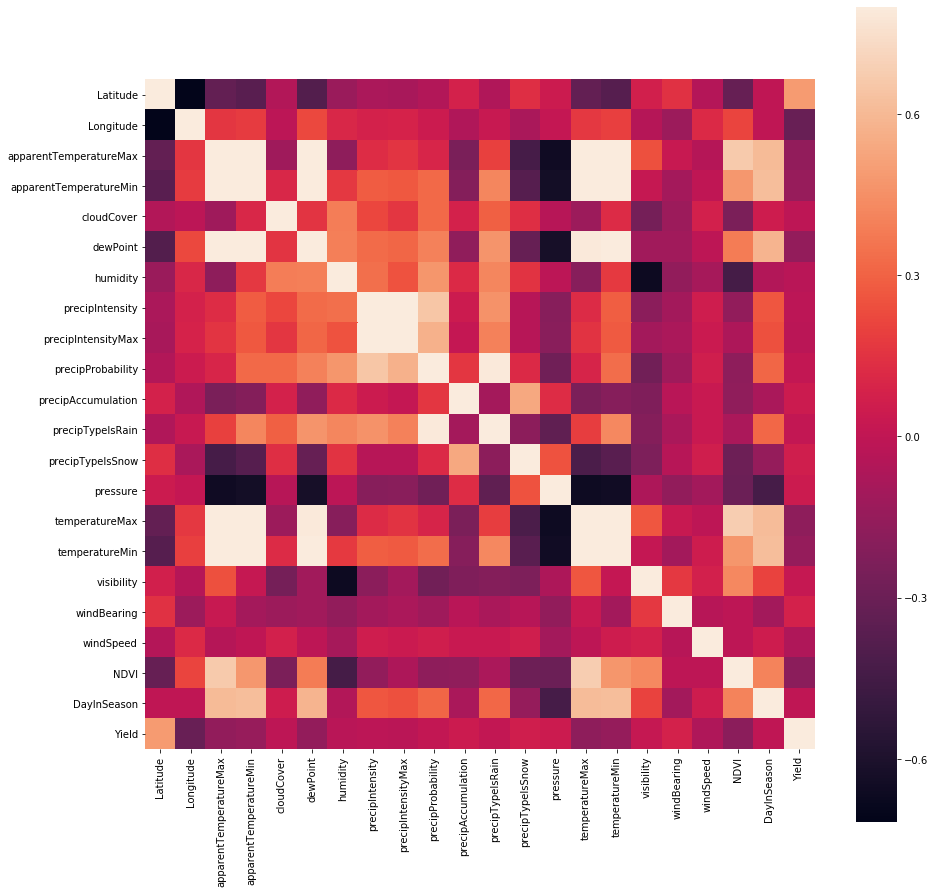

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df2.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [ ]:
df2 = df2.fillna(df2.mean())
df2

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,precipAccumulation,precipTypeIsRain,precipTypeIsSnow,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,46.929839,-118.352109,18.61,-3.01,0.00,6.77,0.69,0.0000,0.0000,0.00,0.0,0,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,47.150327,-118.958859,19.67,-0.74,0.00,6.66,0.65,0.0000,0.0000,0.00,0.0,0,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,46.811686,-118.695237,20.66,-0.14,0.00,6.55,0.67,0.0000,0.0000,0.00,0.0,0,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,47.162342,-118.699677,19.69,-2.66,0.03,7.32,0.69,0.0000,0.0000,0.00,0.0,0,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,47.157512,-118.434056,18.82,-3.04,0.04,7.62,0.70,0.0000,0.0000,0.00,0.0,0,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182544,38.693595,-94.671846,75.44,64.29,0.13,62.74,0.84,0.0211,0.2280,0.86,0.0,1,0,1013.01,75.44,64.29,9.31,133,6.26,134.803101,185,50.1
182545,38.603699,-94.992247,75.47,64.49,0.13,62.83,0.84,0.0206,0.2074,0.85,0.0,1,0,1012.99,75.47,64.49,9.29,132,6.29,133.913879,185,50.1
182546,38.580826,-94.794660,75.40,64.43,0.13,62.77,0.84,0.0212,0.2172,0.86,0.0,1,0,1013.01,75.40,64.43,9.28,132,6.27,129.938950,185,50.1
182547,38.564866,-94.748021,75.35,64.44,0.13,62.74,0.84,0.0214,0.2177,0.86,0.0,1,0,1013.01,75.35,64.44,9.28,132,6.26,129.938950,185,50.1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
b1 = df2['Yield']
a1 = df2.drop('Yield', axis = 1)

a1_train, a1_test, b1_train, b1_test = train_test_split(a1, b1, test_size = 0.3, random_state = 42)

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a1_train = sc.fit_transform(a1_train)
a1_test = sc.transform(a1_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a1_train, b1_train)
b1_pred = regr.predict(a1_test)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =', mse(b1_pred, b1_test))
print('MAE =', mae(b1_pred, b1_test))
print('R2 Score =', r2_score(b1_pred, b1_test))
score_p=[]
score_p.append([mse(b1_pred, b1_test),mae(b1_pred, b1_test),r2_score(b1_pred, b1_test)])


MSE = 64.98646830324311
MAE = 6.16041791367379
R2 Score = -0.3557584820839037


In [ ]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.3)
regressorpoly.fit(a1_train,b1_train)
pred=regressorpoly.predict(a1_test)

print('MSE =', mse(pred, b1_test))
print('MAE =', mae(pred, b1_test))
print('R2 Score =', r2_score(pred, b1_test))

score_p.append([mse(pred, b1_test),mae(pred, b1_test),r2_score(pred, b1_test)])


In [ ]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(a1_train,b1_train , verbose=True)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(a1_test)


print('MSE =', mse(XGBpredictions, b1_test))
print('MAE =', mae(XGBpredictions, b1_test))
print('R2 Score =', r2_score(XGBpredictions, b1_test))

#score_p.append([mse(pred, b1_test),mae(pred, b1_test),r2_score(pred, b1_test)])

[05:54:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



MSE = 22.292525356585106
MAE = 3.6932588228538985
R2 Score = 0.6894761149914925


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = a1_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'accuracy'])
NN_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_51 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_54 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 1)               

In [ ]:
from keras.callbacks import History 
history = History()
History=NN_model.fit(a1_train, b1_train, epochs=50, batch_size=500, validation_split = 0.2, callbacks=[history])

Train on 102227 samples, validate on 25557 samples
Epoch 1/50
102227/102227 [==============================] - 2s 17us/step - loss: 162.4085 - mean_absolute_error: 9.3348 - acc: 0.0031 - val_loss: 75.1291 - val_mean_absolute_error: 6.9618 - val_acc: 0.0039
Epoch 2/50
102227/102227 [==============================] - 1s 10us/step - loss: 72.5355 - mean_absolute_error: 6.8413 - acc: 0.0039 - val_loss: 69.9766 - val_mean_absolute_error: 6.7293 - val_acc: 0.0031
Epoch 3/50
102227/102227 [==============================] - 1s 10us/step - loss: 66.1659 - mean_absolute_error: 6.4819 - acc: 0.0040 - val_loss: 61.8847 - val_mean_absolute_error: 6.2575 - val_acc: 0.0039
Epoch 4/50
102227/102227 [==============================] - 1s 10us/step - loss: 60.1908 - mean_absolute_error: 6.1566 - acc: 0.0030 - val_loss: 56.6621 - val_mean_absolute_error: 5.9292 - val_acc: 0.0029
Epoch 5/50
102227/102227 [==============================] - 1s 10us/step - loss: 56.0449 - mean_absolute_error: 5.8671 - acc: 0.

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


Text(0.5, 0, 'epoch')

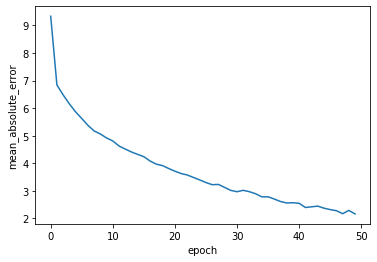

In [ ]:
print(history.history.keys())
plt.plot(History.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')


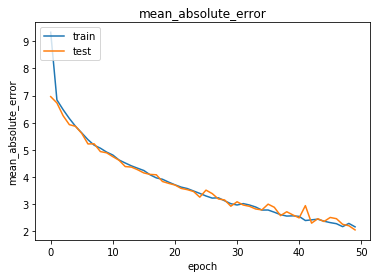

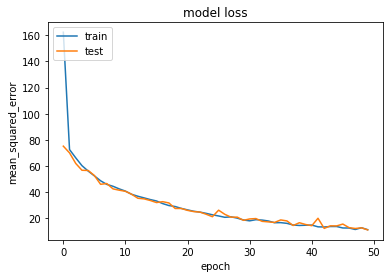

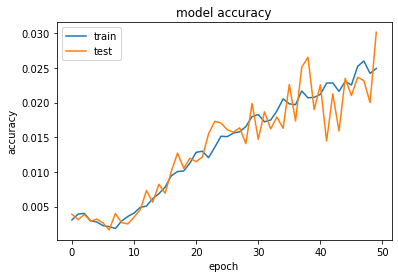

In [ ]:
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
score_p.append([10.9619, 2.0490, 0])

#**Case study : Crop Counting**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Bennet/number_final.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,ID,no
0,0,36
1,1,58
2,2,94
3,3,157
4,4,46


In [ ]:
train.columns

Index(['ID', 'no'], dtype='object')

In [ ]:
train.shape

(10, 2)

In [ ]:
import glob
filelist = glob.glob('/content/drive/My Drive/Bennet/images/*.jpg')
filelist

['/content/drive/My Drive/Bennet/images/4.jpg',
 '/content/drive/My Drive/Bennet/images/7.jpg',
 '/content/drive/My Drive/Bennet/images/8.jpg',
 '/content/drive/My Drive/Bennet/images/0.jpg',
 '/content/drive/My Drive/Bennet/images/1.jpg',
 '/content/drive/My Drive/Bennet/images/5.jpg',
 '/content/drive/My Drive/Bennet/images/2.jpg',
 '/content/drive/My Drive/Bennet/images/3.jpg',
 '/content/drive/My Drive/Bennet/images/6.jpg',
 '/content/drive/My Drive/Bennet/images/9.jpg']

In [ ]:
train_image = []

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/0.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/1.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/2.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/3.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/4.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/5.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/6.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/7.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/8.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
img = image.load_img('/content/drive/My Drive/Bennet/images/9.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [ ]:
X = np.array(train_image)

In [ ]:
X.shape

(10, 400, 400, 3)

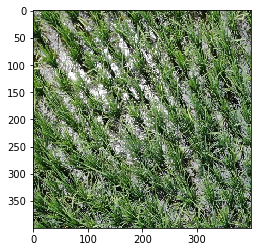

In [ ]:
plt.imshow(X[2])

In [ ]:
train['no'][2]

94

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (400,400,3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_initializer='normal', activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, activation='linear'))

In [ ]:
y = np.array(train.drop(['ID'],axis=1))
y.shape

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 398, 398, 32)      896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 396, 396, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 194, 194, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 95, 95, 32)       

In [ ]:
model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
from keras.callbacks import History
history = History()
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=True)

Train on 8 samples, validate on 2 samples
Epoch 1/50
8/8 [==============================] - 2s 242ms/step - loss: 493.2541 - mean_absolute_error: 18.8226 - val_loss: 560.0835 - val_mean_absolute_error: 16.9895
Epoch 2/50
8/8 [==============================] - 0s 23ms/step - loss: 2700.8657 - mean_absolute_error: 45.4412 - val_loss: 279.0172 - val_mean_absolute_error: 14.6845
Epoch 3/50
8/8 [==============================] - 0s 21ms/step - loss: 877.6073 - mean_absolute_error: 26.9160 - val_loss: 342.8274 - val_mean_absolute_error: 15.8673
Epoch 4/50
8/8 [==============================] - 0s 20ms/step - loss: 629.2876 - mean_absolute_error: 19.9056 - val_loss: 715.7715 - val_mean_absolute_error: 25.6671
Epoch 5/50
8/8 [==============================] - 0s 19ms/step - loss: 575.8782 - mean_absolute_error: 22.2541 - val_loss: 369.3440 - val_mean_absolute_error: 16.6747
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 438.9362 - mean_absolute_error: 16.6673 - val_loss

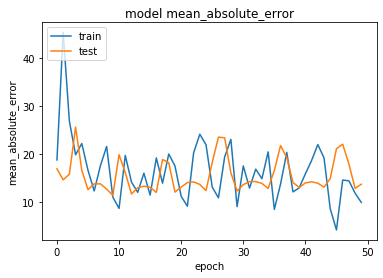

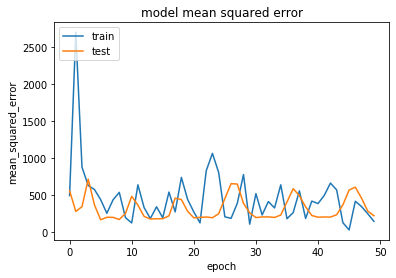

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score_p.append([10.9619, 2.0490, 0])

In [ ]:
score_p

[[64.98646830324311, 6.16041791367379, -0.3557584820839037],
 [76.45229451092023, 6.869027418142515, -0.9122296222732091],
 [10.9619, 2.049, 0]]

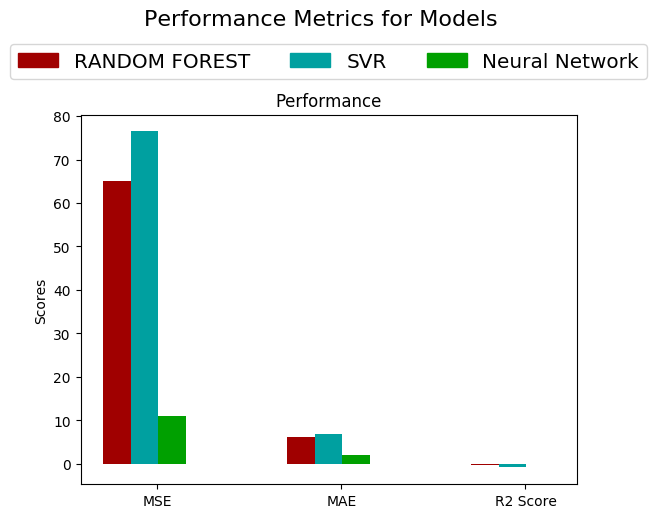

In [ ]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

objects = ['MSE', 'MAE', 'R2 Score']
w =  0.15
y_pos = np.arange(len(objects))

color = ['#A00000','#00A0A0','#00A000', '#FFFF00']
s = 0
for i in range(len(score_p)):
    plt.bar(y_pos+s, score_p[i], color = color[i], width = w )
    s += w
    
plt.xticks(y_pos + 0.22, objects)
plt.ylabel('Scores')
plt.title('Performance')
plt.suptitle("Performance Metrics for Models", fontsize = 16, y = 1.10)

p = ['RANDOM FOREST',  'SVR', 'Neural Network']

patches = []

for k in range(len(p)):
    patches.append(mpatches.Patch(color = color[k], label = p[k]))

plt.legend(handles = patches, bbox_to_anchor = (0.5, 1.19),loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')

plt.show();

In [ ]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "image.jpg"), output_image_path=os.path.join(execution_path , "imagenew.jpg"))

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )